# lec05_무위험_위험_자산

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# 무위험자산 모델링
- 단리
- 복리
    - 연속 : 가능한 많이, 횟수 미정
    - 이산 : (1+r)^n : 년간 x 회

## 연속 복리 이자
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcHHNrd%2Fbtq5G08sNjl%2F0C3WRnMhq8w6jzpsu2CAK1%2Fimg.png'>

In [2]:
import math
# 1,000 원을 10년동안 10%의 이자를 연속 복리로 계산시
r =0.1   # 이자
n = 10   # 기간
X = 1000 # 원금

# 1000 * math.e**(0.1 * 10), 1000 * np.exp(0.1*10)
print(X * math.e**(r*n))
print(X * np.exp(r*n) )

2718.2818284590453
2718.2818284590453


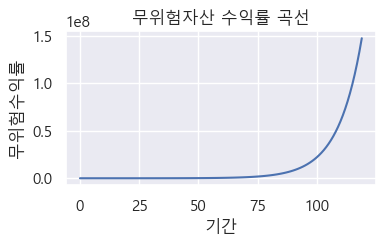

In [3]:
def my_risk_free_value(X, r, n) :
    return X * math.e**(r*n)
n = np.array([m for m in np.arange(0, 120, 1)])

r = 0.1
X = 1000
res_arr = my_risk_free_value(X, r, n)
plt.figure(figsize=(4,2))
plt.plot(n, res_arr)
plt.title("무위험자산 수익률 곡선")
plt.xlabel("기간")
plt.ylabel("무위험수익률")
plt.show()

# Random Walk
* 시장에 존재하는 무작위성이라는 성질을 수학적으로 묘사
* 확률과정(Stochastic Process)
100원짜리 동전 한 개를 가지고 위험자산의 무작위성을 모델링
* 한계 : 이산과정(Discrete Process)  연속과정(Continuous Process)로 변환 필요
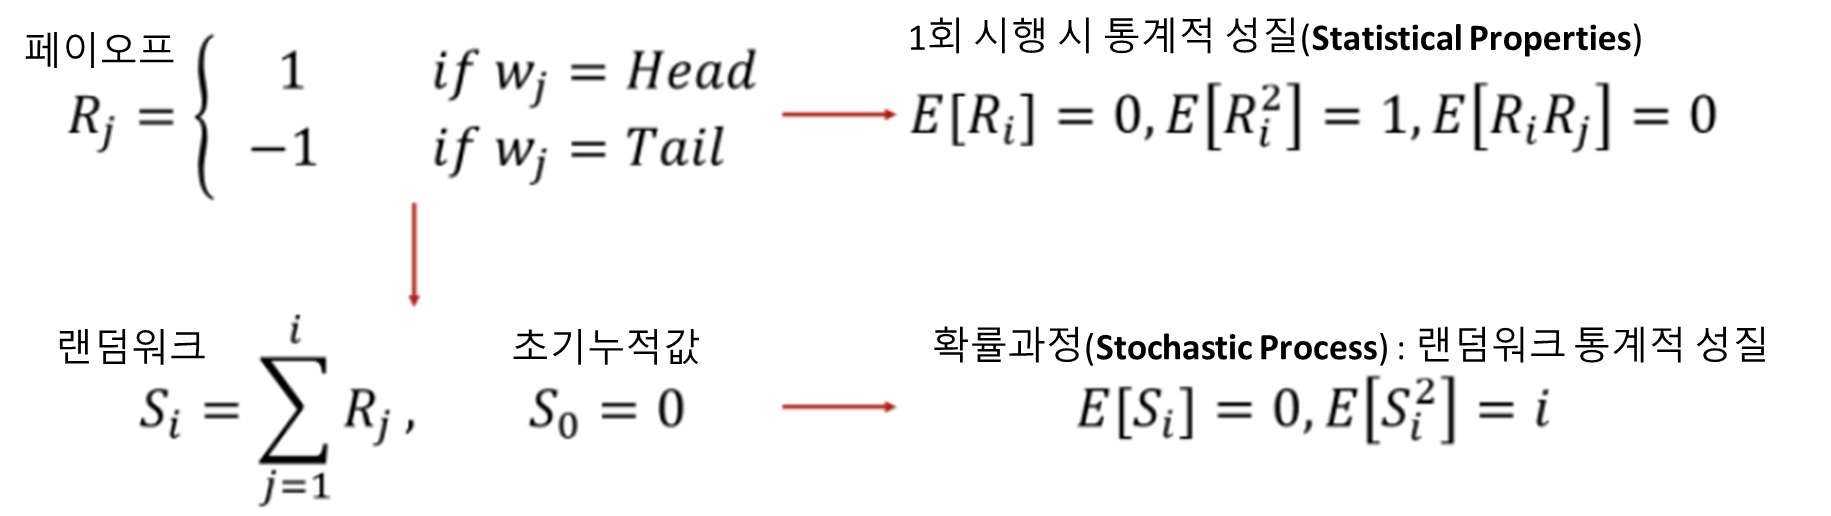

# 브라운 운동(Brownian Motion), 위너 프로세스(Wiener Process)
* 무작위성(Randomness)
    * 위험자산의 예측 불가능성(무작위성)을 수학적으로 표현
    * 한계 : <b>통계적 성질(Statistical Properties) 결여</b>
* <font color=red><b>위험자산 특징
  1) 위너 : 예측 불가능성(무작위성)
  2) 평균 : 시간의 흐름에 따른 장기적 추세
  3) 편차 : 단기적 변동성

In [4]:
T = 1 # 만기 1년
N = 1000
dt = T / N
np.sqrt(dt)

0.03162277660168379

In [5]:
# Generate Series of 1) Time, 2) White Noise & 3) Brownian Motion
t = np.array([i for i in np.arange(0, T, dt)])
dX = np.random.randn(N) * np.sqrt(dt)
X = np.cumsum(dX)

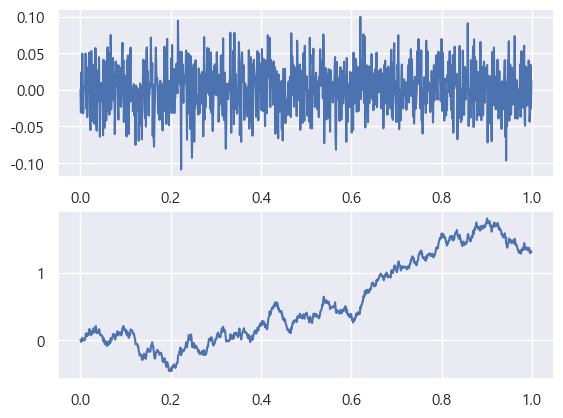

In [6]:
# Print Graph
plt.subplot(2, 1, 1)
plt.plot(t, dX)
plt.subplot(2, 1, 2)
plt.plot(t, X)

# 위험자산 모델링
* 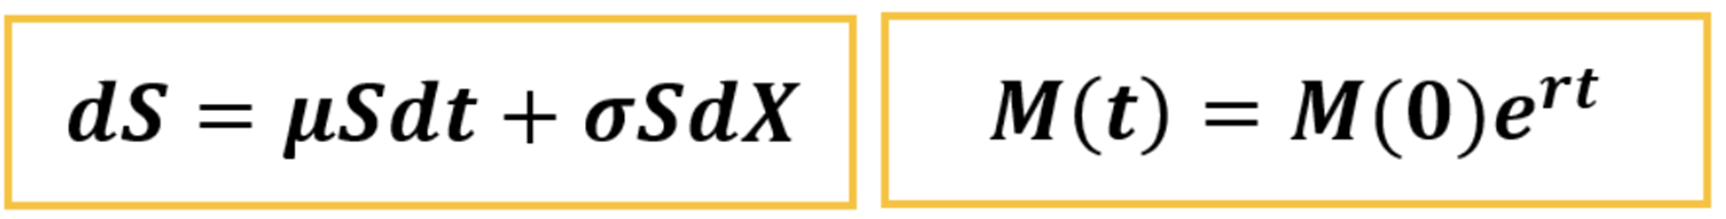
* 이토의 보조정리 – 확률 미적분 분야에서의 연쇄법칙
    * 연쇄법칙(기초자산-파생상품 간의 관계)를 <font color=red><b>확률 미적분</b></font>으로 설명
    * <img width=400 src="https://mblogthumb-phinf.pstatic.net/MjAxOTAyMTZfMTEy/MDAxNTUwMzEyNjc2NzI2.9Xyd8iDhLA3cRD0HtWEOMz45GBbmTtxmim8N7u8pOEgg.XPlNxEBEqRnMn11fGrVulZx2dlQxuKouZ5Ob_0DRtTAg.PNG.stochastic73/image.png?type=w800">

[1261.29765516 1269.30439609 1245.81961453 1310.41664415 1333.03695513
 1291.83865329 1323.93746034 1294.55371962 1277.06384796 1305.99846102]


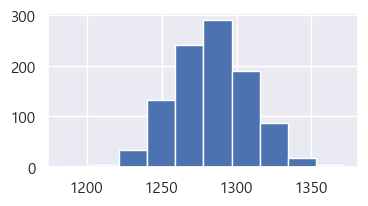

In [7]:
S0 = 1000     # 위험자산
mu = 0.25      # drift(장기적 추세), 시장의 무위험 이자율 : 단기채권금리, CD 금리
sigma = 0.02  # difussion(단기적 변동성)
t =1          # 만기 1년

St = S0 * np.exp((mu - 0.5 * sigma ** 2) * t + sigma * np.sqrt(t) * np.random.randn(N))
print(St[:10])

plt.figure(figsize=(4, 2))
plt.hist(St)
plt.show()

## 효율적 투자 곡선
- 위험자산 포트폴리오
    - x축 : 리스크(${\sigma}$)
    - y축 : 기대수익률(${\mu}$)

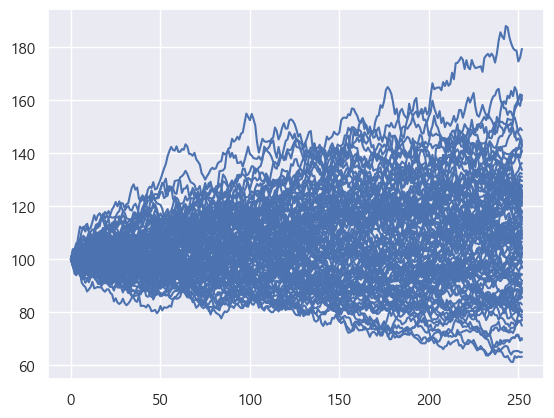

In [8]:
S0 = 100                  # 초기가격(Initial Price)
mu = 0.1                  # 추세(Drift)
sigma = 0.23              # 변동성(Volatility)
T = 1.0                   # 만기(Time to Maturity)
N = 100                   # 시뮬레이션 횟수
D = 252                   # 1년영업일수
dt = T / D                # 일의 연율화
S = np.zeros((D + 1, N))  # (253, 10000)
S[0] = S0                 # 초기가격
for t in range(1, D + 1): # 위험자산 수익률
    
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(N))
    
plt.plot(S, c='b')
plt.show()

# 무위험포트폴리오
* 기초자산 + 옵션을 합성한 무위험 포트폴리오
* <font color=red><b>델타헤지(Delta Hedge)  
     불확실성을 제거하기 위해 기초자산을 델타만큼 사거나 팔아 포트폴리오의 위험을 제거


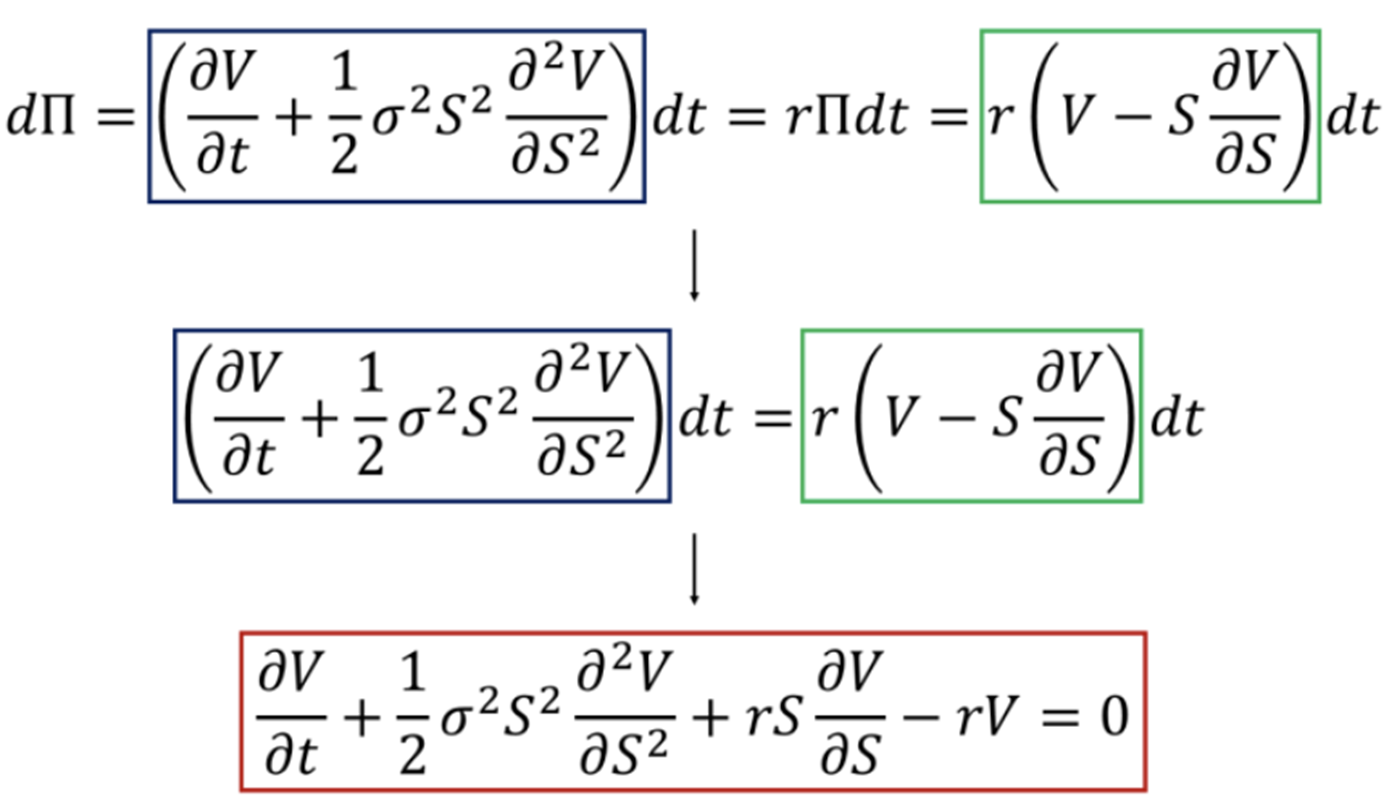

# 블랙숄즈 편미분 방정식

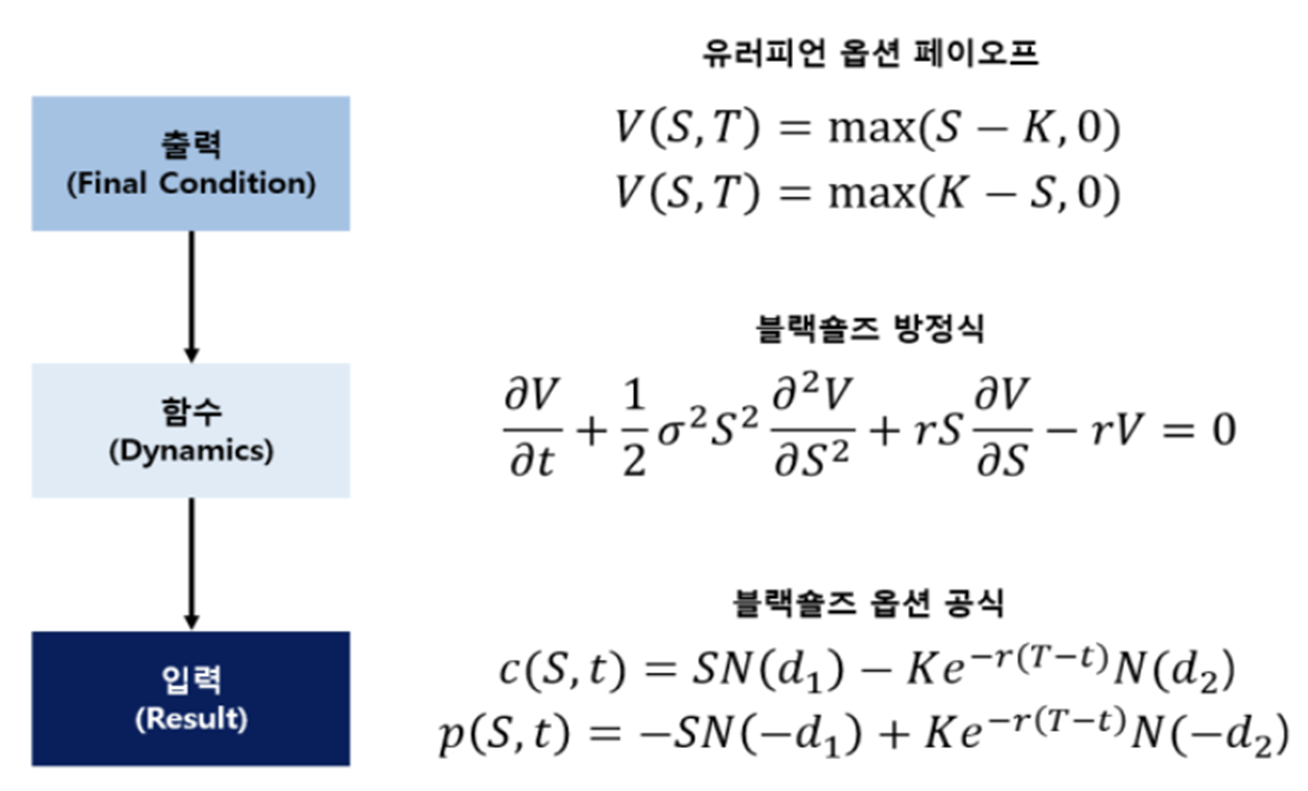

# 블랙숄즈 옵션가

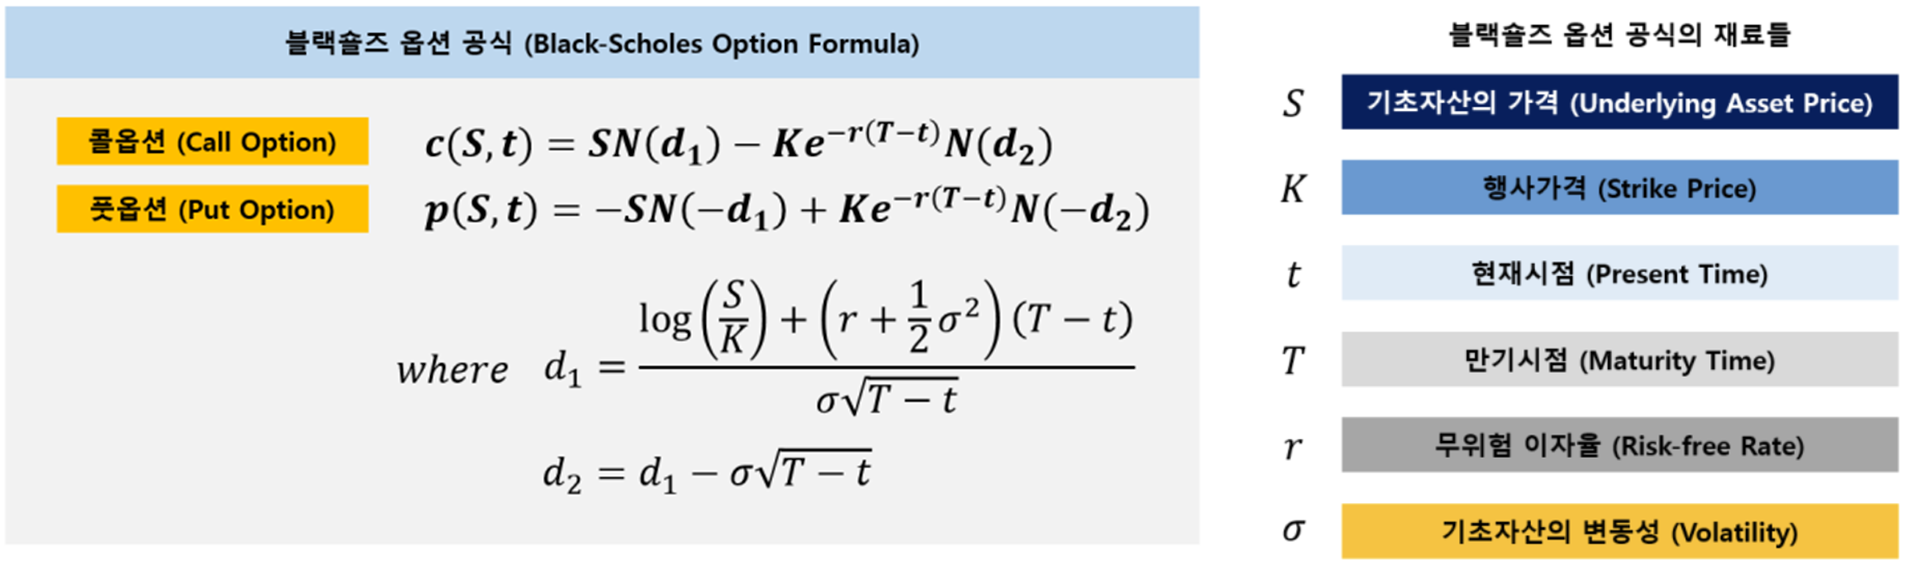

* 잔존만기
* np.busday_count() :  between begindates and enddates, not including the day of enddates.

In [9]:
def my_잔존만기(현재일, 만기일, workday=252) : 
    # t = pd.to_datetime(시작일).date()
    # T = pd.to_datetime(종료일).date()
    # dcnt = (np.busday_count(T, t))  
    dcnt = (np.busday_count(현재일, 만기일))  
    return dcnt
print(my_잔존만기('2023-05-15', '2023-07-22'))
현재일, 만기일 = '2023-05-15', '2023-07-22'
잔존만기일 = my_잔존만기('2023-05-15', '2023-07-22')  


50


- 강사님

In [10]:
기초자산가 = 1000
행사가     = 1300
이자율     = 0.25
변동율     = 0.2

from scipy import  stats
def 옵션이론가(기초자산가, 행사가, 잔존만기일, 이자율=0.25, 변동율=0.2, 구분='call'):
    d1 = (  np.log(기초자산가 / 행사가)  + (이자율 + 변동율**2 * 0.5) * 잔존만기일) / (변동율 * np.sqrt(잔존만기일))
    d2 = d1 -  (변동율 * np.sqrt(잔존만기일))
    print(d1, d2)
    if  구분=='call':
        옵션이론가 = 기초자산가 * stats.norm.cdf(d1, 0.0, 1.0)   -  행사가 * np.exp(-이자율*잔존만기일) * stats.norm.cdf(d2, 0.0, 1.0)
    else : 
        옵션이론가 = -1*기초자산가 * stats.norm.cdf(-1*d1, 0.0, 1.0) +  행사가 * np.exp(-이자율*잔존만기일) * stats.norm.cdf(-1*d2, 0.0, 1.0)
    return 옵션이론가
옵션이론가(기초자산가, 행사가, 잔존만기일,구분='call' )
옵션이론가(기초자산가, 행사가, 잔존만기일, 구분='put')

9.360421995472407 7.946208433099312
9.360421995472407 7.946208433099312


6.873510290148217e-19

- 내꺼

In [11]:
import datetime

S=1000
K=1300
t= datetime.date.today().strftime('%Y-%m-%d')
T= pd.to_datetime("2023-07-22").strftime('%Y-%m-%d')
# T= "2023-07-24"

r=0.25
sigma=0.2

In [12]:
import numpy as np
import scipy.stats as stat

def my_option(S, K, T,t, r, sigma, option_type):
    diff_day=np. busday_count(t,T)
    # print(diff_day)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * diff_day) / (sigma * np.sqrt(diff_day))
    d2 = d1 - sigma * np.sqrt(diff_day)
    
    if option_type == 'call':
        V = S * stat.norm.cdf(d1) - K * np.exp(-r * diff_day) * stat.norm.cdf(d2)
    else:
        V = K * np.exp(-r * diff_day) * stat.norm.cdf(-d2) - S * stat.norm.cdf(-d1)
        # V = S * stat.norm.cdf(d1) - K * np.exp(-r * diff_day) * stat.norm.cdf(-d2)
    
    return V

print(my_option(S, K, T,t, r, sigma, "call")) 
print(my_option(S, K, T,t, r, sigma, "put"))

999.9937793473903
1.7266412557911358e-18


# option-price API

In [13]:
# ! pip install option-price

In [14]:
# from optionprice import Option
# opt = Option(european=True,
#                     kind='call',
#                     s0=1000,   # 기초자산가
#                     k=1300,    # 행사가
#                     t=50,      # 잔존만기
#                     sigma=0.2, # 변동률
#                     r=0.25,    # 수익률
#                     dv=0,      # 배당
#                     start='2023-05-15', 
#                     end='2023-07-22')
# print(opt)
# print(opt.getPrice())

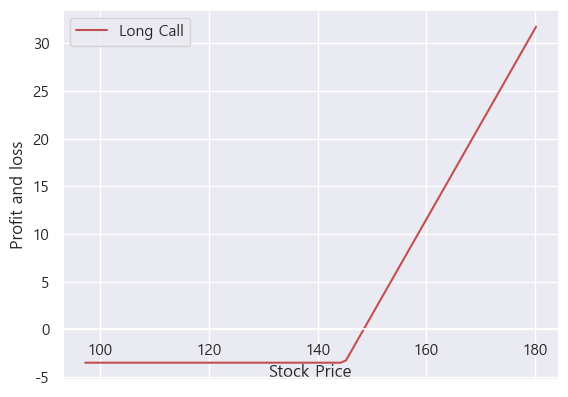

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn


# Fortis stock price 
spot_price = 138.90

# Long put
strike_price_long_put = 135
premium_long_put = 4

# Long call
strike_price_long_call = 145 
premium_long_call = 3.50

# Stock price range at expiration of the put
sT = np.arange(0.7*spot_price,1.3*spot_price,1)


def call_payoff(sT, strike_price, premium):
   return np.where(sT > strike_price, sT - strike_price, 0) - premium
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Long Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()